In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Modern seaborn style
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.1)

In [2]:
sns.set_theme(style="whitegrid", palette="pastel")
pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
# 1. Basic data exploration
print("\n--- Data Info ---")
df.info()

print("\n--- Descriptive Statistics ---")
print(df.describe(include='all'))



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB

--- Descriptive Statistics ---
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
uni

In [5]:
print("\n1.2 - Dataset Dimensions:", df.shape)

# 1.3 - Data Types & Missing Values
print("\n1.3 - Data Types and Null Counts:")
display(pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique()
}))

# 1.4 - Numerical Summary
print("\n1.4 - Numerical Feature Statistics:")
display(df.describe().round(2))
print("\n1.5 - Duplicate Rows:", df.duplicated().sum())



1.2 - Dataset Dimensions: (891, 12)

1.3 - Data Types and Null Counts:


,Data Type,Missing Values,Unique Values
PassengerId,int64,0,891
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,0,248



1.4 - Numerical Feature Statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33



1.5 - Duplicate Rows: 0


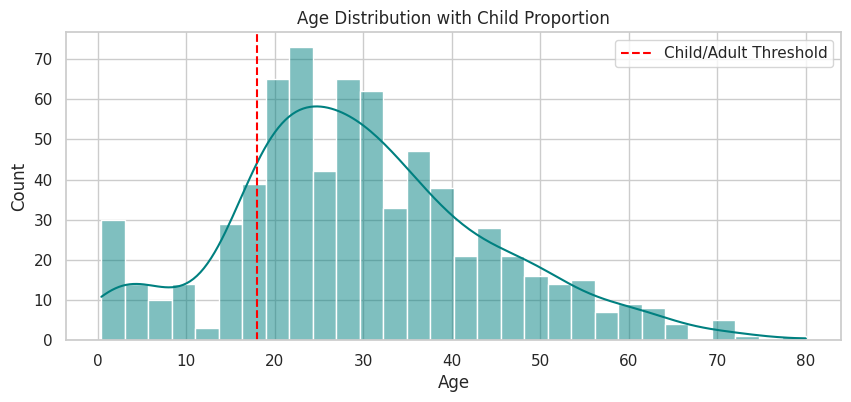

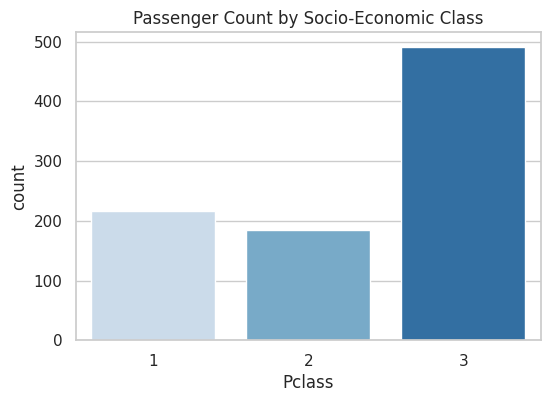

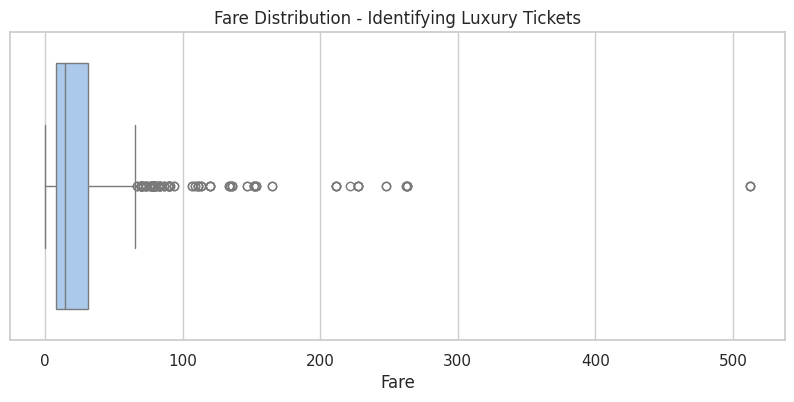

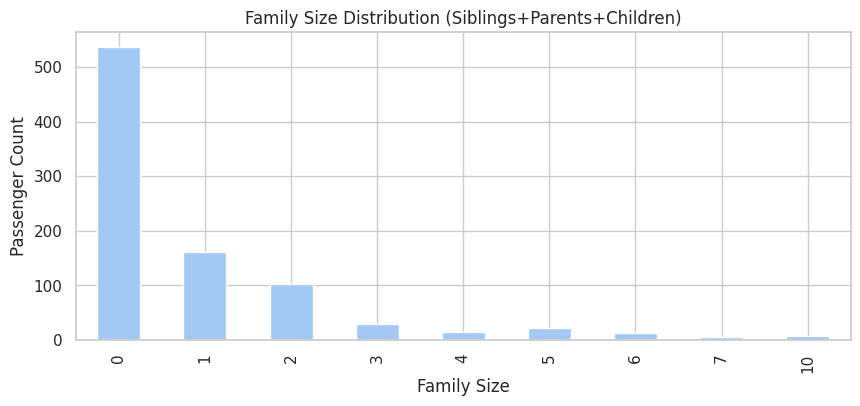

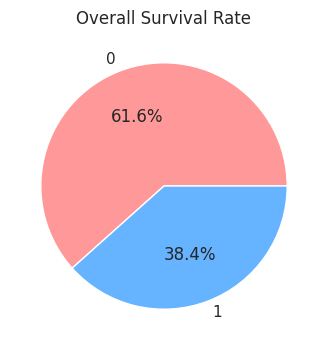

In [7]:
#Age Distribution
plt.figure(figsize=(10,4))
sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='teal')
plt.axvline(18, color='red', linestyle='--', label='Child/Adult Threshold')
plt.title("Age Distribution with Child Proportion")
plt.legend()
plt.show()

#Passenger class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', data=df, palette='Blues')
plt.title("Passenger Count by Socio-Economic Class")
plt.show()

#Fare Distribution
plt.figure(figsize=(10,4))
sns.boxplot(x=df['Fare'])
plt.title("Fare Distribution - Identifying Luxury Tickets")
plt.show()
#Family size
plt.figure(figsize=(10,4))
(df['SibSp'] + df['Parch']).value_counts().sort_index().plot(kind='bar')
plt.title("Family Size Distribution (Siblings+Parents+Children)")
plt.xlabel("Family Size")
plt.ylabel("Passenger Count")
plt.show()

#Survival rate
plt.figure(figsize=(4,4))
df['Survived'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("Overall Survival Rate")
plt.ylabel("")
plt.show()

The following boxplot shows how fare varies across different passenger classes.


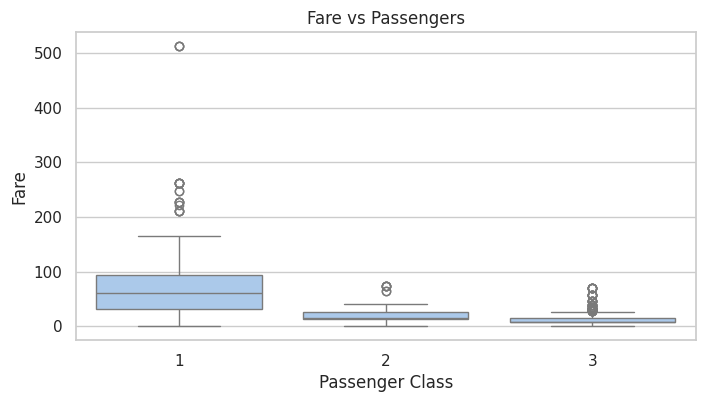

In [8]:
#Fare vs Passenger
plt.figure(figsize=(8,4))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare vs Passengers")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
print('The following boxplot shows how fare varies across different passenger classes.')
plt.show()

The plot below compares survival counts for male and female passengers.


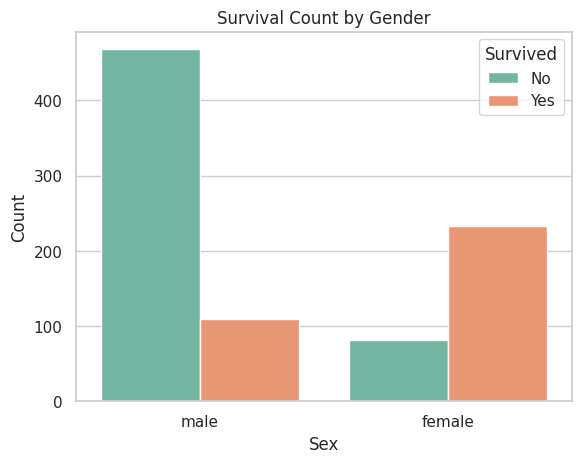

In [9]:
#Gender vs Survival
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set2')
plt.title("Survival Count by Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
print('The plot below compares survival counts for male and female passengers.')
plt.show()

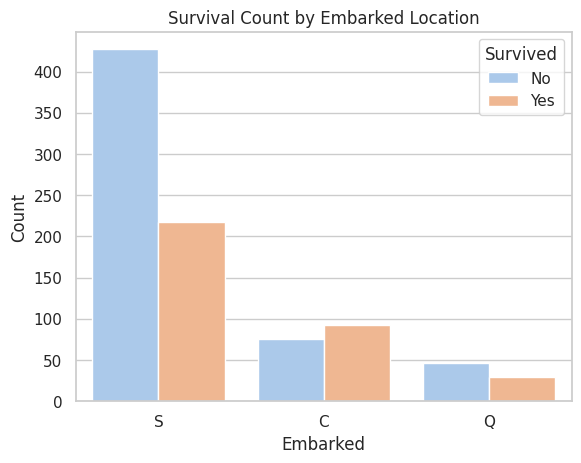

In [10]:
#Embarked Location vs Survival
sns.countplot(x='Embarked', hue='Survived', data=df, palette='pastel')
plt.title("Survival Count by Embarked Location")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

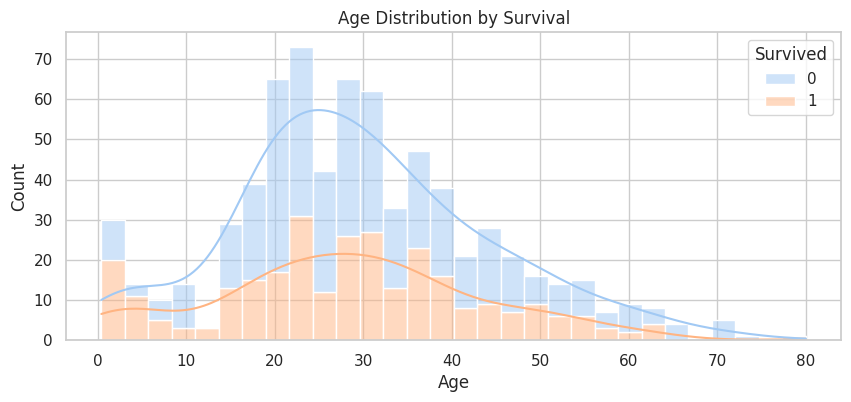

In [11]:
#Age vs Survival
plt.figure(figsize=(10,4))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, multiple="stack")
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

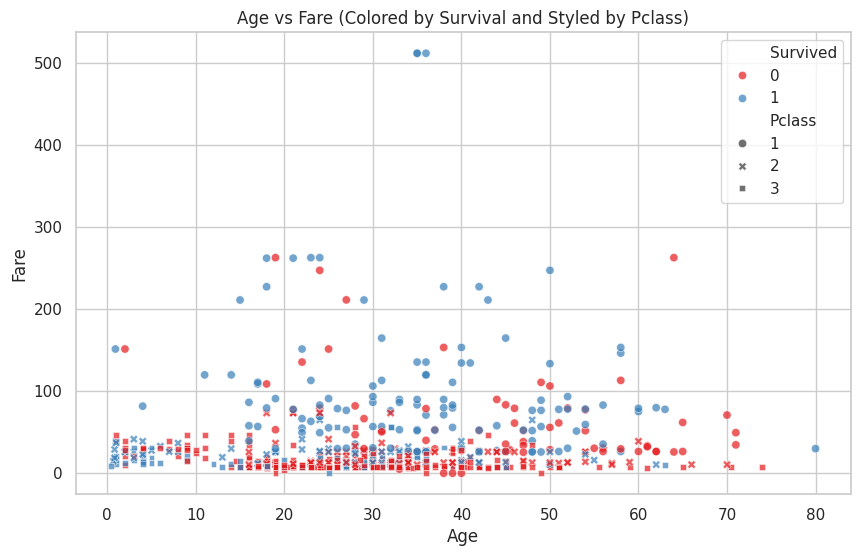

In [12]:
#Age vs Fare vs Survival
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', style='Pclass', palette='Set1', alpha=0.7)
plt.title("Age vs Fare (Colored by Survival and Styled by Pclass)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

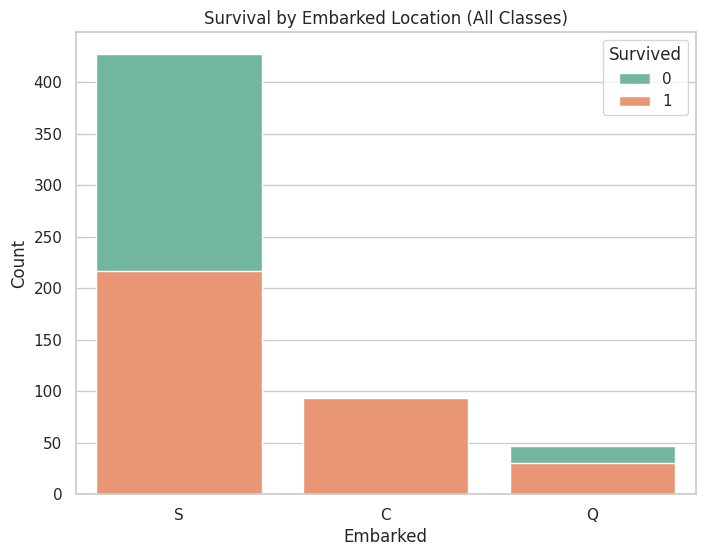

<Figure size 1000x600 with 0 Axes>

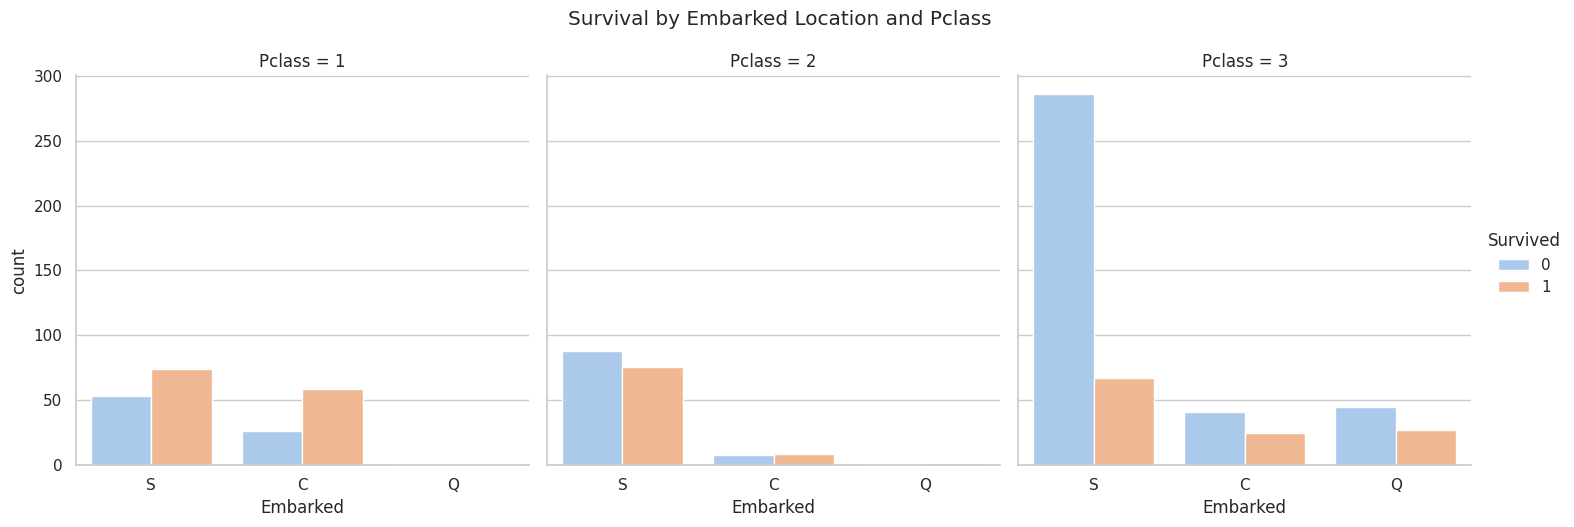

In [13]:
#Embarked vs Pclass vs Survival
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Embarked', hue='Survived', palette='Set2', dodge=False)
plt.title("Survival by Embarked Location (All Classes)")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.show()


#Breakdown by class
plt.figure(figsize=(10,6))
sns.catplot(data=df, x='Embarked', hue='Survived', col='Pclass', kind='count', palette='pastel')
plt.suptitle("Survival by Embarked Location and Pclass", y=1.05)
plt.show()

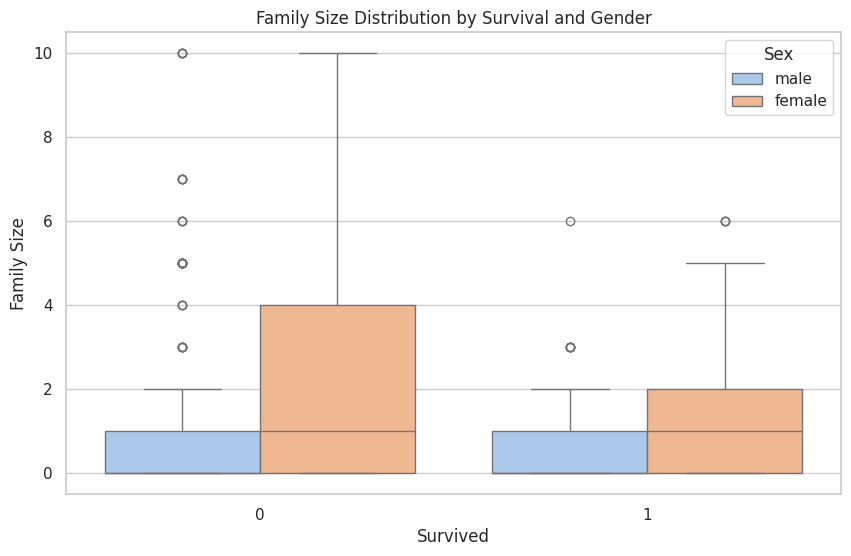

In [14]:
#Family Size vs Sex vs Survival
#I compute family size and see how it interacts with sex and survival
df['FamilySize'] = df['SibSp'] + df['Parch']

plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='FamilySize', hue='Sex', data=df)
plt.title("Family Size Distribution by Survival and Gender")
plt.xlabel("Survived")
plt.ylabel("Family Size")
plt.show()

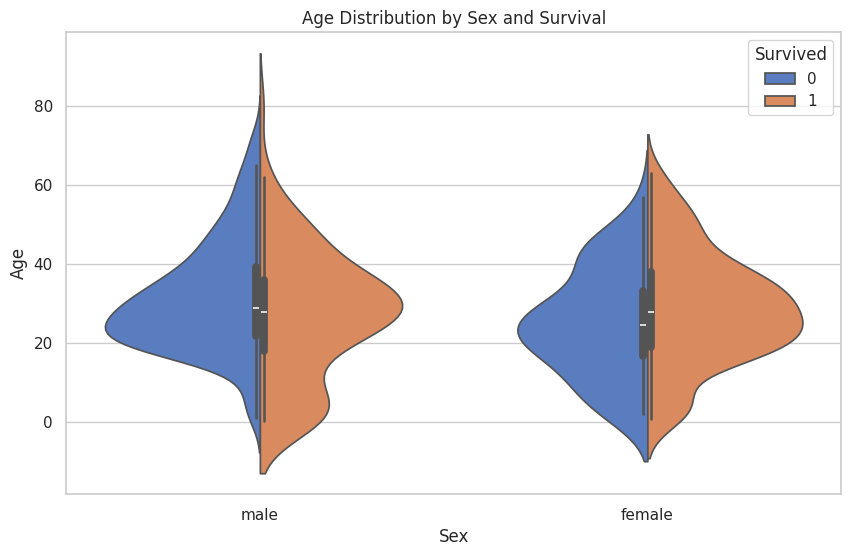

In [15]:
#Age Distribution by Sex and Survival
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='Sex', y='Age', hue='Survived', split=True, palette='muted')
plt.title("Age Distribution by Sex and Survival")
plt.xlabel("Sex")
plt.ylabel("Age")
plt.show()

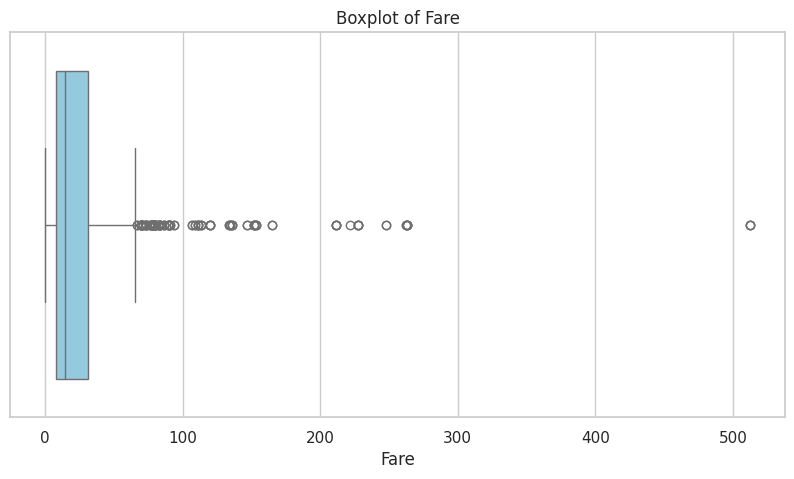

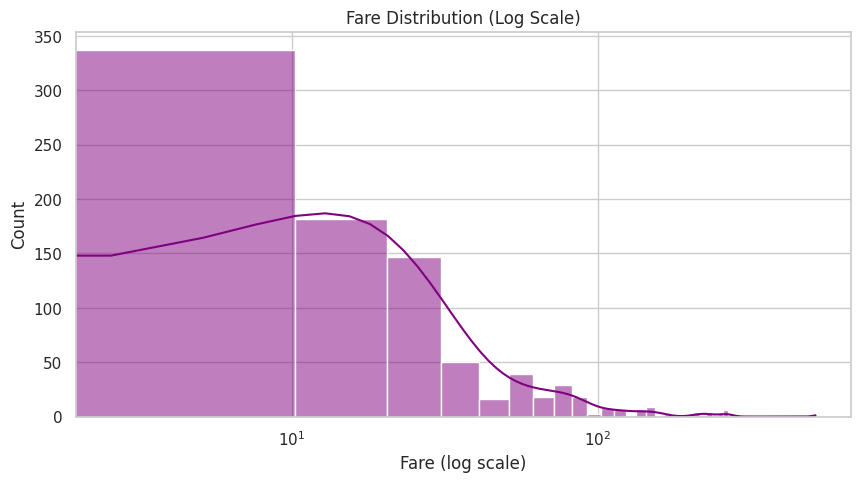

In [16]:
#1. Detecting Outliers in Fare
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Fare'], color='skyblue')
plt.title("Boxplot of Fare")
plt.xlabel("Fare")
plt.show()


#We can also visualize it with a histogram and log scale to see the distribution better:
plt.figure(figsize=(10,5))
sns.histplot(df['Fare'], bins=50, kde=True, color='purple')
plt.xscale('log')
plt.title("Fare Distribution (Log Scale)")
plt.xlabel("Fare (log scale)")
plt.show()

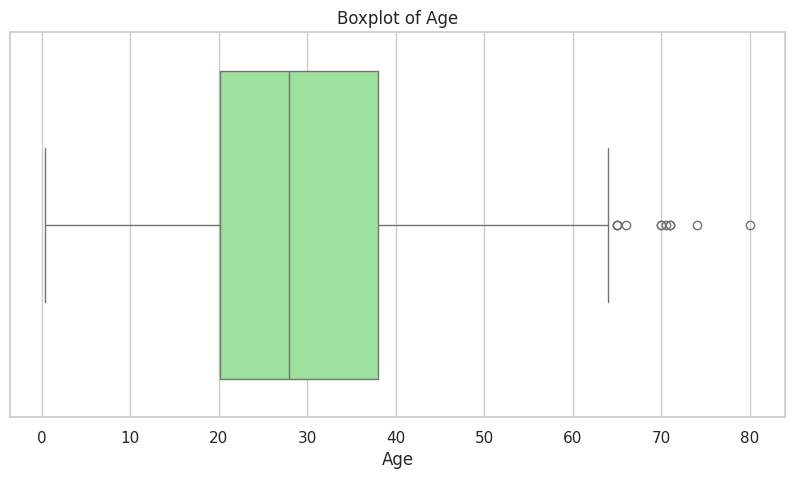

In [17]:
#Outliers in Age
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Age'], color='lightgreen')
plt.title("Boxplot of Age")
plt.xlabel("Age")
plt.show()

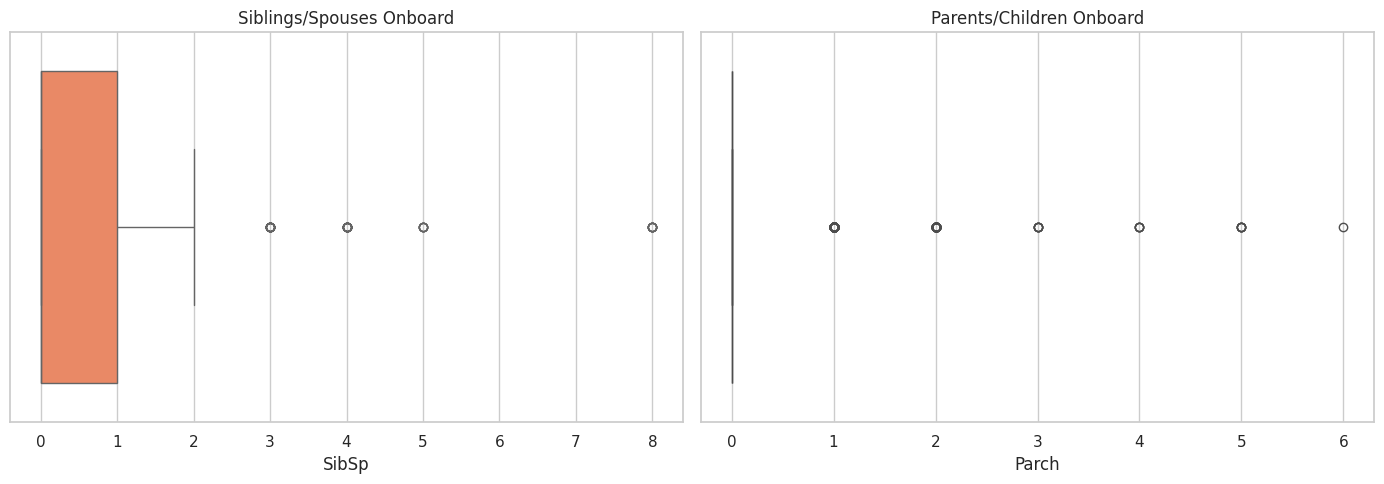

In [18]:
#SibSp and Parch Outliers
fig, axs = plt.subplots(1, 2, figsize=(14,5))

sns.boxplot(x=df['SibSp'], ax=axs[0], color='coral')
axs[0].set_title("Siblings/Spouses Onboard")

sns.boxplot(x=df['Parch'], ax=axs[1], color='gold')
axs[1].set_title("Parents/Children Onboard")

plt.tight_layout()
plt.show()

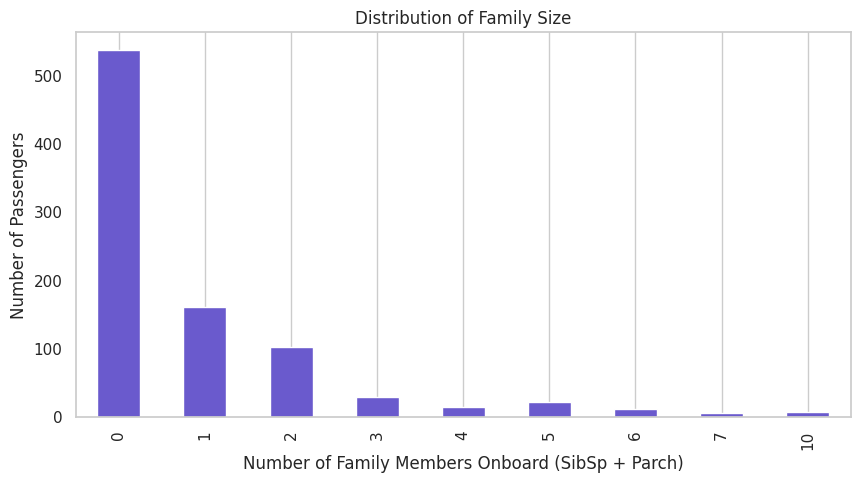

In [19]:
#Detecting Outliers in Family Size
df['FamilySize'] = df['SibSp'] + df['Parch']
plt.figure(figsize=(10,5))
df['FamilySize'].value_counts().sort_index().plot(kind='bar', color='slateblue')
plt.title("Distribution of Family Size")
plt.xlabel("Number of Family Members Onboard (SibSp + Parch)")
plt.ylabel("Number of Passengers")
plt.grid(axis='y')
plt.show()

In [21]:
pd.crosstab([df['Pclass'], df['Sex']], df['Survived'],
           normalize='index').round(2).style.background_gradient()

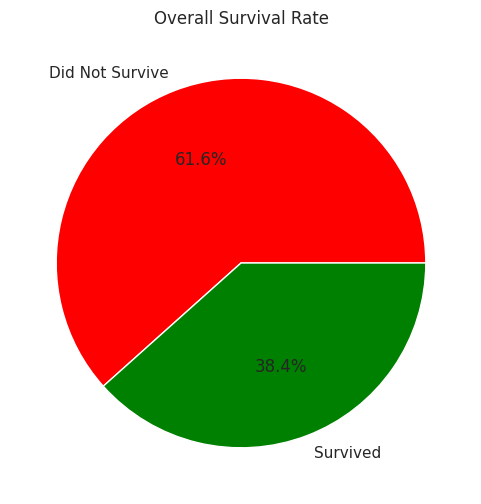

In [22]:
#Distribution of the Target Variable
plt.figure(figsize=(6,6))
df['Survived'].value_counts().plot.pie(autopct='%1.1f%%', colors=['red','green'], labels=['Did Not Survive', 'Survived'])
plt.title("Overall Survival Rate")
plt.ylabel("")
plt.show()

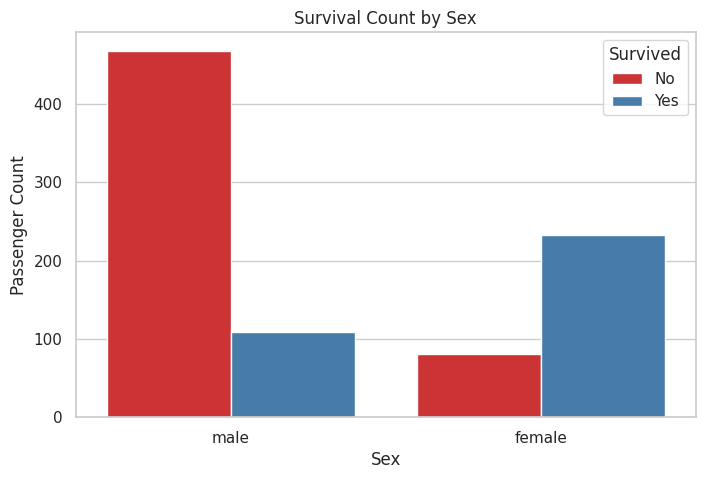

In [23]:
#Survival rate by sex
plt.figure(figsize=(8,5))
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set1')
plt.title("Survival Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Passenger Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


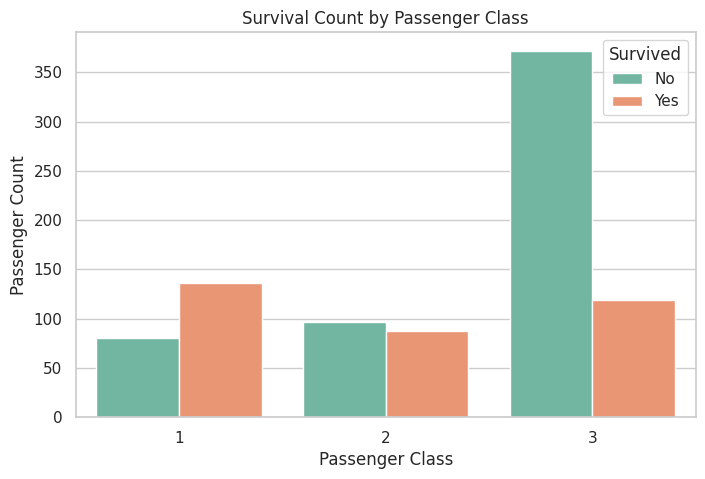

In [24]:
#Survival rate by passenger class
plt.figure(figsize=(8,5))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set2')
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Passenger Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

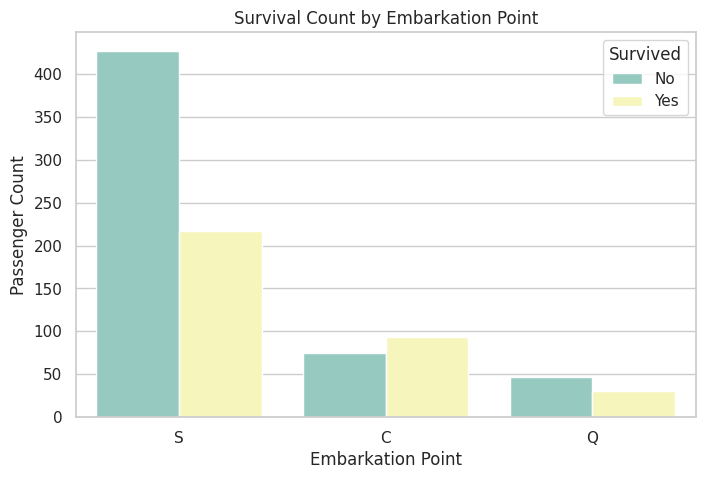

In [25]:
#Survival rate by embarked location
plt.figure(figsize=(8,5))
sns.countplot(x='Embarked', hue='Survived', data=df, palette='Set3')
plt.title("Survival Count by Embarkation Point")
plt.xlabel("Embarkation Point")
plt.ylabel("Passenger Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

<Figure size 1000x600 with 0 Axes>

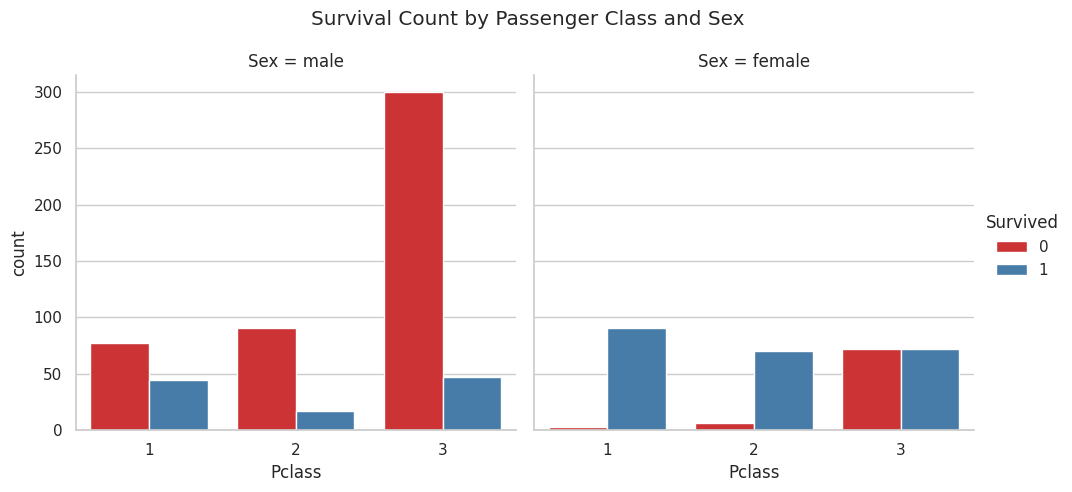

In [26]:
#Combined Effects: Survival by Pclass and Sex
plt.figure(figsize=(10,6))
sns.catplot(x='Pclass', hue='Survived', col='Sex', data=df, kind='count', palette='Set1', height=5, aspect=1)
plt.subplots_adjust(top=0.85)
plt.suptitle('Survival Count by Passenger Class and Sex')
plt.show()

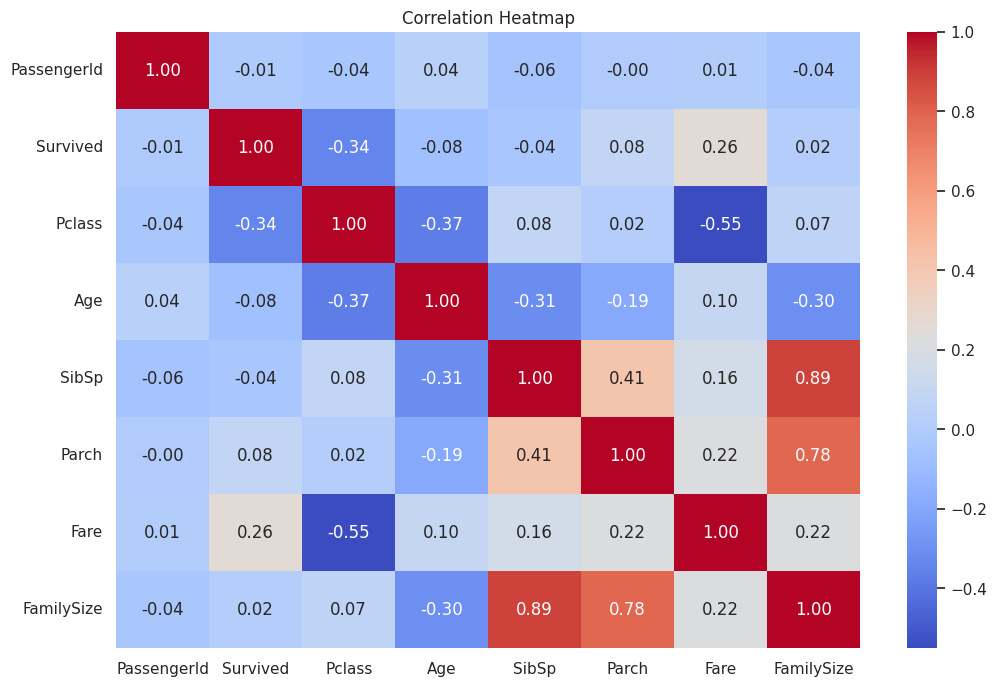

In [27]:
# 3. Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
